In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [2]:
dataset = pd.read_csv('All.csv')

In [3]:
dataset.shape

(36707, 80)

In [4]:
#  change the value of URL_Type_obf_Type
# 0: benign 1:defacement 2: phishing 3: malware 4:spam


dataset.loc[dataset["URL_Type_obf_Type"] =='Defacement', "URL_Type_obf_Type"] = 1
dataset.loc[dataset["URL_Type_obf_Type"] =='benign', "URL_Type_obf_Type"] = 0
dataset.loc[dataset["URL_Type_obf_Type"] =='phishing', "URL_Type_obf_Type"] = 2
dataset.loc[dataset["URL_Type_obf_Type"] =='malware', "URL_Type_obf_Type"] = 3
dataset.loc[dataset["URL_Type_obf_Type"] =='spam', "URL_Type_obf_Type"] = 4


In [5]:
dataset = pd.DataFrame(dataset)


In [6]:
##drop rows containing NaN value

dataset.dropna(inplace = True)


In [7]:
X = dataset.iloc[:, 0:79].values
y = dataset.iloc[:, 79].values
y=y.astype('int')

In [8]:
# Splitting Data


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
y_test[:100]

array([3, 2, 2, 0, 1, 2, 4, 3, 3, 1, 0, 3, 2, 2, 4, 3, 3, 0, 4, 0, 3, 4,
       4, 3, 1, 4, 3, 3, 2, 2, 2, 3, 0, 4, 3, 0, 0, 2, 2, 3, 4, 0, 0, 3,
       2, 4, 1, 3, 2, 1, 4, 0, 3, 0, 4, 4, 2, 1, 4, 3, 1, 1, 4, 2, 2, 3,
       2, 3, 2, 0, 3, 0, 3, 3, 1, 4, 0, 1, 2, 1, 2, 0, 4, 4, 2, 3, 4, 0,
       3, 3, 3, 2, 2, 2, 2, 4, 4, 3, 3, 2])

In [10]:
# apply RandomForest
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [11]:
y_pred = np.round(y_pred)

In [12]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
score1= accuracy_score(y_test, y_pred)

[[ 457   40   15    2    0]
 [   0  463   30    3    0]
 [   6   31  727   32    5]
 [   0    2   21  897    0]
 [   2    1   12   30 1021]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       514
           1       0.86      0.93      0.90       496
           2       0.90      0.91      0.91       801
           3       0.93      0.97      0.95       920
           4       1.00      0.96      0.98      1066

    accuracy                           0.94      3797
   macro avg       0.93      0.93      0.93      3797
weighted avg       0.94      0.94      0.94      3797

0.9388991308928101


In [13]:
#Import knearest neighbors Classifier model


#Create KNN Classifier
knn = KNeighborsClassifier()

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_1 = knn.predict(X_test)

In [14]:
print(confusion_matrix(y_test,y_pred_1))
print(classification_report(y_test,y_pred_1))
print(accuracy_score(y_test, y_pred_1))
score2= accuracy_score(y_test, y_pred_1)

[[ 490    2   11   11    0]
 [   1  469   21    2    3]
 [  24   43  692   21   21]
 [   8    5   25  877    5]
 [   5    6   10    3 1042]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       514
           1       0.89      0.95      0.92       496
           2       0.91      0.86      0.89       801
           3       0.96      0.95      0.96       920
           4       0.97      0.98      0.98      1066

    accuracy                           0.94      3797
   macro avg       0.93      0.94      0.94      3797
weighted avg       0.94      0.94      0.94      3797

0.9402159599683961


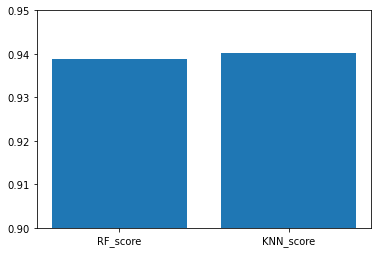

In [23]:
from matplotlib import pyplot as plt 
x =['RF_score','KNN_score']
y = [score1, score2]
plt.ylim(0.90, 0.95)
plt.bar(x,y)
plt.show()